In [1]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

from sklearn.metrics import accuracy_score
from sklearn import metrics 


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [4]:
# Data Loading

columns = ['Wine','Alcohol','Malic_acid','Ash',
                 'Alcalinity_ash','Magnesium','Total_phenols',
                 'Flavanoids','Nonflavanoinds_phenols',
                 'Proanthocyanins','Color_intensity',
                 'Hue','OD280_OD315_of_diluted_wines','Proline']

#data = pd.read_csv('Wine.csv', header=None)
data_train = pd.read_csv('Wine.csv', header=None, names=columns,)
data_train.head()



print ("Original Wine dataframe", data_train.shape)

data_train


Original Wine dataframe (178, 14)


,Wine,Alcohol,Malic_acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoinds_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Wine                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_ash                178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoinds_phenols        178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280_OD315_of_diluted_wines  178 non-null    float64
 13  Proli

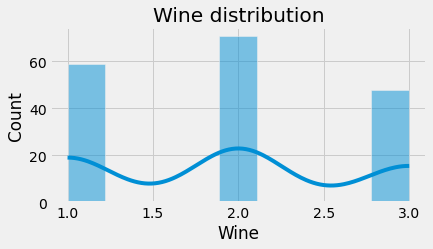

In [6]:
# Distribution of the output variable
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=data_train, x='Wine', kde=True,ax=ax)
ax.set_title("Wine distribution")
ax.set_xlabel('Wine');

In [7]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        data_train.drop(columns = "Wine"),
                                        data_train['Wine'],
                                        random_state = 123,
                                        shuffle      = True
                                    )


In [8]:
# Checking training and test datasets

print("Training dataset")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
#display(X_train.describe(include = 'object'))
print(" ")

print("Test dataset")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
#display(X_test.describe(include = 'object'))

Training dataset
-----------------------


count    133.000000
mean       1.849624
std        0.743622
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: Wine, dtype: float64

,Alcohol,Malic_acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoinds_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,13.032180,2.247444,2.335714,19.077444,99.398496,2.329850,2.134135,0.348346,1.639248,4.930601,0.974256,2.671805,754.857143
std,0.826751,1.101713,0.276428,3.210697,13.994014,0.637855,0.943642,0.120279,0.545021,2.234045,0.225811,0.695531,322.734579
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.560000,1.290000,278.000000
25%,12.360000,1.530000,2.200000,16.800000,88.000000,1.800000,1.360000,0.260000,1.350000,3.170000,0.820000,2.120000,495.000000
50%,13.050000,1.810000,2.320000,19.000000,98.000000,2.410000,2.210000,0.320000,1.620000,4.600000,1.000000,2.840000,680.000000
75%,13.720000,2.680000,2.500000,21.000000,107.000000,2.800000,2.920000,0.430000,1.970000,6.130000,1.120000,3.200000,1020.000000
max,14.750000,5.800000,3.220000,30.000000,151.000000,3.880000,3.930000,0.660000,2.960000,13.000000,1.710000,4.000000,1680.000000


 
Test dataset
-----------------------


count    45.000000
mean      2.200000
std       0.814639
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Wine, dtype: float64

,Alcohol,Malic_acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoinds_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,12.907333,2.599111,2.457556,20.728889,100.755556,2.192444,1.719333,0.401778,1.448000,5.434889,0.907778,2.434000,723.355556
std,0.767311,1.133406,0.249373,3.443018,15.221330,0.583657,1.100313,0.129321,0.631451,2.540225,0.231986,0.730272,292.727701
min,11.450000,1.100000,1.820000,14.000000,78.000000,1.350000,0.470000,0.170000,0.410000,2.080000,0.480000,1.270000,290.000000
25%,12.420000,1.650000,2.280000,18.000000,89.000000,1.700000,0.660000,0.270000,1.030000,3.270000,0.720000,1.750000,520.000000
50%,12.850000,2.400000,2.480000,20.000000,98.000000,2.050000,1.500000,0.400000,1.360000,5.280000,0.890000,2.510000,630.000000
75%,13.480000,3.370000,2.620000,23.000000,107.000000,2.600000,2.580000,0.500000,1.710000,6.900000,1.090000,3.000000,880.000000
max,14.830000,5.510000,3.230000,28.500000,162.000000,3.250000,5.080000,0.630000,3.580000,11.750000,1.360000,3.710000,1515.000000


In [9]:
# Taking care of variables acoording to their tye
# ==============================================================================
# The numerical columns are standardized (normaliozed) 
# The categorical columns are treated using one-hot-encoding
# To keep the columns that we do not want to apply any transformation
# we have to apply remainder='passthrough'.

# Identificaction of numerivcal and categorical columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformations for the numerical variables
numeric_transformer = Pipeline(
                        #steps=[('scaler', StandardScaler())]
                        steps=[('scaler', MinMaxScaler())]
                      )

# Transformations for the categorical variables
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [10]:
numeric_cols

['Alcohol',
 'Malic_acid',
 'Ash',
 'Alcalinity_ash',
 'Magnesium',
 'Total_phenols',
 'Flavanoids',
 'Nonflavanoinds_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280_OD315_of_diluted_wines',
 'Proline']

In [11]:
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Alcohol', 'Malic_acid', 'Ash',
                                  'Alcalinity_ash', 'Magnesium',
                                  'Total_phenols', 'Flavanoids',
                                  'Nonflavanoinds_phenols', 'Proanthocyanins',
                                  'Color_intensity', 'Hue',
                                  'OD280_OD315_of_diluted_wines', 'Proline']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

In [12]:
set_config(display='text')

In [13]:
# Application of transformations
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [14]:
X_train_prep

array([[0.76344086, 0.22924901, 0.77419355, ..., 0.6       , 0.77859779,
        0.45435093],
       [1.        , 0.19565217, 0.55376344, ..., 0.6       , 0.53136531,
        0.62196862],
       [0.16397849, 0.26086957, 0.59139785, ..., 0.3826087 , 0.53874539,
        0.28673324],
       ...,
       [0.55913978, 0.05335968, 0.1827957 , ..., 0.48695652, 0.69741697,
        0.15977175],
       [0.37634409, 0.15612648, 0.5       , ..., 0.11304348, 0.57195572,
        0.05278174],
       [0.15591398, 0.12055336, 0.72043011, ..., 0.34782609, 0.72693727,
        0.28673324]])

In [15]:
# Trying a model 
# ==============================================================================
# Modelos
# ==============================================================================
model_1 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

model_2 = MLPClassifier(
                hidden_layer_sizes=(10),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

model_3 = MLPClassifier(
                hidden_layer_sizes=(20, 20),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

model_4 = MLPClassifier(
                hidden_layer_sizes=(50, 50, 50),
                learning_rate_init=0.01,
                solver = 'adam',
                max_iter = 5000,
                random_state = 123
            )

model_1.fit(X=X_train_prep, y=y_train)
model_2.fit(X=X_train_prep, y=y_train)
model_3.fit(X=X_train_prep, y=y_train)
model_4.fit(X=X_train_prep, y=y_train)


MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=5000, random_state=123)

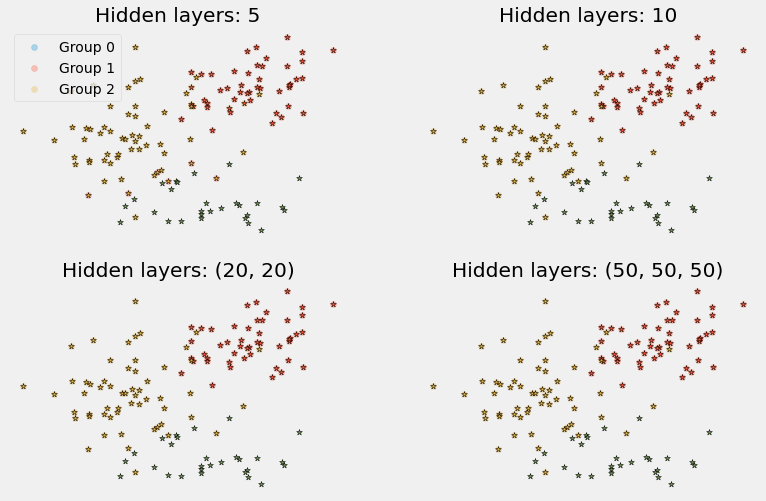

In [16]:
# Graphic of predictions
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()

X_grid = np.column_stack([X_train_prep[:,0].flatten(), X_train_prep[:,6].flatten()])  # Alcohol anf flavanoids selected

for i, model in enumerate([model_1, model_2, model_3, model_4]):
    
    predictions = model.predict(X_train_prep)
  
    for j in np.unique(predictions-1):  # -1 because now labels start in 1
        axs[i].scatter(
            x = X_grid[predictions == j, 0],
            y = X_grid[predictions == j, 1], 
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            #marker = 'o',
            alpha = 0.3,
            label= f"Group {j}"
        )


    for j in np.unique(y_train):
        axs[i].scatter(
            x = X_grid[y_train == j, 0],
            y = X_grid[y_train == j, 1], 
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            marker    = '*',
            edgecolor = 'black'
        )
        
    axs[i].set_title(f"Hidden layers: {model.hidden_layer_sizes}")
    axs[i].axis('off')
axs[0].legend();

In [20]:
prediction_test = model_1.predict(X_test_prep)

print('Accuracy model 1: {:.2f}'.format(accuracy_score(y_test, prediction_test)))

Accuracy model 1: 0.87


In [21]:
prediction_test = model_2.predict(X_test_prep)

print('Accuracy model 2: {:.2f}'.format(accuracy_score(y_test, prediction_test)))

Accuracy model 2: 1.00


In [22]:
prediction_test = model_3.predict(X_test_prep)

print('Accuracy model 3: {:.2f}'.format(accuracy_score(y_test, prediction_test)))

Accuracy model 3: 0.98


In [23]:
prediction_test = model_4.predict(X_test_prep)

print('Accuracy model 4: {:.2f}'.format(accuracy_score(y_test, prediction_test)))

Accuracy model 4: 0.96


In [24]:
# Number of neurons
# ==============================================================================
param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 25, 50]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X_train_prep, y_train)

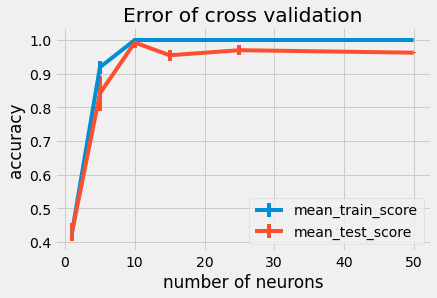

In [25]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('number of neurons')
ax.set_title('Error of cross validation');

In [26]:
# learning rate
# ==============================================================================
param_grid = {'learning_rate_init':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        hidden_layer_sizes=(10),
                        solver = 'adam',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X_train_prep, y_train)

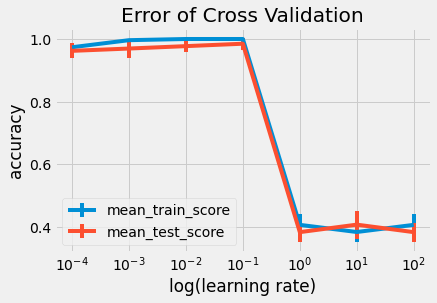

In [27]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate_init', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_learning_rate_init', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xscale('log')
ax.set_xlabel('log(learning rate)')
ax.set_ylabel('accuracy')
ax.set_title('Error of Cross Validation');

In [28]:
# space search of each hyperparameter
# ==============================================================================
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'adam', max_iter= 2000),
        param_distributions = param_distributions,
        n_iter     = 50, # Maximum number of combinations tested
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train_prep, y = y_train)

# Resultados del grid
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
2,0.001,"(20, 20)",0.01,0.992424,0.010714,1.0,0.0
3,0.01,"(10, 10)",1.0,0.992424,0.010714,1.0,0.0
33,0.1,"(20, 20)",1.0,0.992424,0.010714,1.0,0.0
35,0.1,10,0.1,0.992424,0.010714,1.0,0.0
10,0.1,"(20, 20)",0.1,0.992424,0.010714,1.0,0.0
25,0.01,10,0.001,0.984848,0.021427,1.0,0.0
26,0.001,"(20, 20)",0.001,0.984848,0.010714,1.0,0.0
32,0.01,"(20, 20)",0.001,0.984848,0.010714,1.0,0.0
18,0.001,"(10, 10)",1.0,0.984848,0.010714,1.0,0.0
16,0.1,"(10, 10)",0.001,0.984848,0.010714,1.0,0.0


In [29]:
# best model selected

model_final = grid.best_estimator_
model_final

prediction_train= model_final.predict(X_train_prep)

In [30]:
prediction_test = model_final.predict(X_test_prep)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, prediction_test)))

Accuracy: 0.98


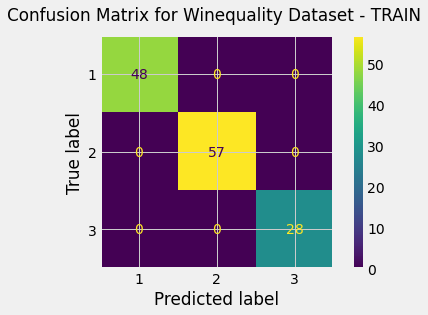

In [31]:
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(model_final, X_train_prep, y_train, display_labels=model_final.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset - TRAIN")
plt.show()

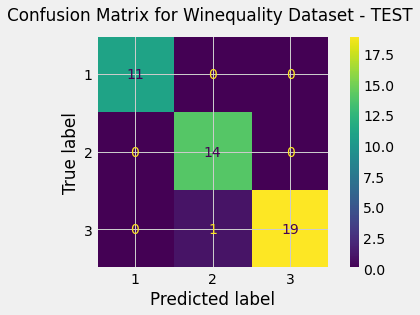

In [32]:

fig = plot_confusion_matrix(model_final, X_test_prep, y_test, display_labels=model_final.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset - TEST")
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.93      1.00      0.97        14
           3       1.00      0.95      0.97        20

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



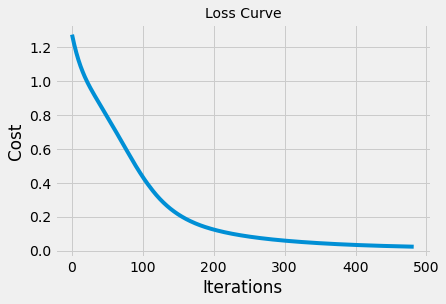

In [34]:
plt.plot(model_final.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [35]:
print("weights between input and first hidden layer:")
print(model_final.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(model_final.coefs_[1])

weights between input and first hidden layer:
[[ 5.91931124e-07  3.85002930e-01  6.17023017e-01 -4.34947496e-01
   1.45105105e-01  1.09786492e-02  2.51955158e-01  5.45726598e-01
   4.01258771e-01  3.96494723e-01  1.57715866e-01  2.15359942e-02
   6.26442322e-01  5.24710117e-01  2.72590942e-01 -1.94127359e-01
   1.88910395e-01  2.44420297e-01  1.08180523e-02 -4.84810802e-01]
 [-2.83826792e-04  3.89476381e-01  1.68385188e-01 -1.16974655e-01
   2.55688028e-01  2.14753948e-06 -1.49295338e-01 -2.59587267e-01
   1.71096893e-01  6.42140246e-01 -1.26419849e-01 -2.46807264e-03
   2.03523959e-02  9.47747303e-03 -5.70204460e-03 -4.37680863e-01
  -4.21058477e-01  3.70983032e-01 -2.93887235e-01 -4.72220407e-01]
 [ 2.27292813e-08 -1.33594127e-01  4.19880966e-01 -5.17673983e-03
  -1.79314086e-01 -2.80917075e-05  4.24732008e-01  2.19001513e-01
   2.22487373e-01  2.01178954e-02 -3.93187626e-01 -6.94589040e-02
   3.96662498e-02  4.10684724e-01  2.28405740e-01 -3.46878112e-01
   2.15439738e-01 -3.9028629

In [36]:
print("Bias values for first hidden layer:")
print(model_final.intercepts_[0])
print("\nBias values for second hidden layer:")
print(model_final.intercepts_[1])

Bias values for first hidden layer:
[ 0.0009297   0.19164889  0.23875768  0.65579056  0.40029446 -0.42565948
  0.67962036 -0.38259549 -0.04409393  0.21414031  0.58511775 -0.29542427
  0.27078196 -0.04065194  0.03992098  0.57046184  0.18418709  0.63945498
  0.4383684   0.67406028]

Bias values for second hidden layer:
[ 0.12849472 -0.23348592 -0.22796295  0.21796865  0.04761948  0.28374217
 -0.00734706  0.07129142  0.00466539  0.19828058  0.10872835  0.25871391
 -0.10801249 -0.35407715 -0.32850487  0.19253013 -0.00945753 -0.00407218
 -0.43074919  0.01573484]


In [37]:
# selection a coupl of variables for representation. Column 0 Añcohol and 6 Flavanoids

X_grid = np.column_stack([X_train_prep[:,0].flatten(), X_train_prep[:,6].flatten()])
predicciones = model_final.predict(X_train_prep)

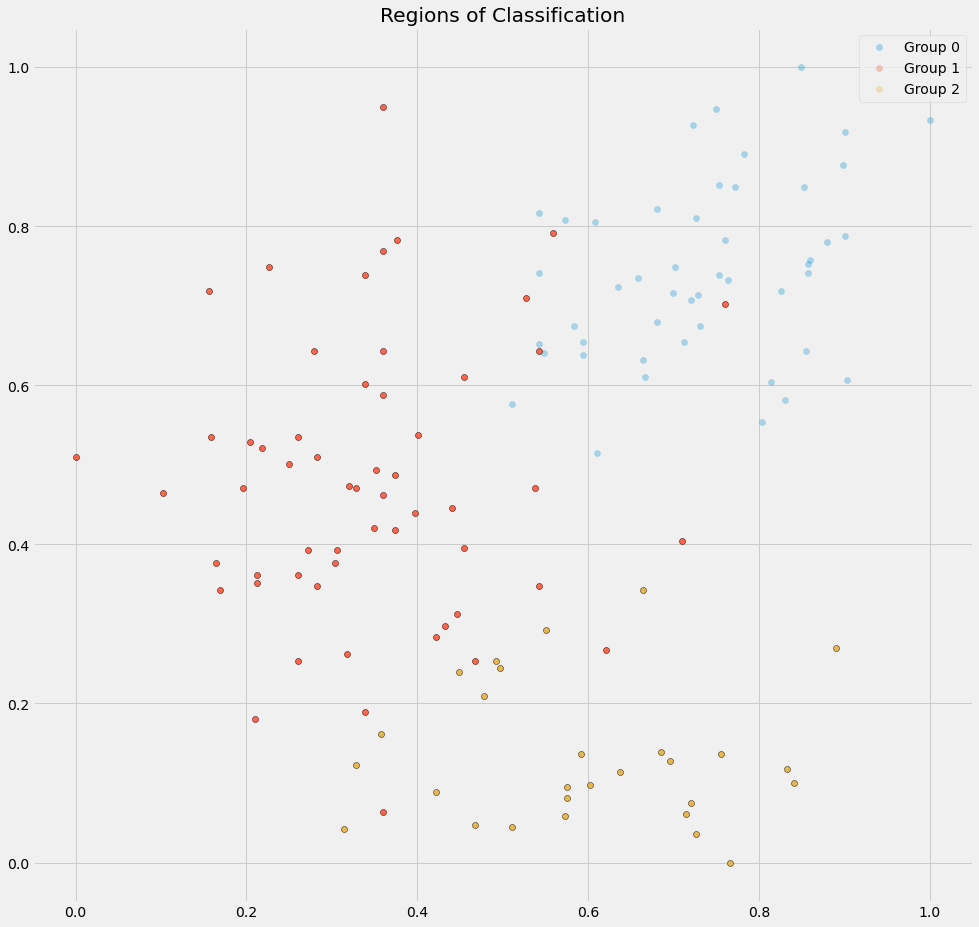

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

for i in np.unique(predicciones-1):
    ax.scatter(
        x = X_grid[predicciones-1 == i, 0],
        y = X_grid[predicciones-1 == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        #marker = 'o',
        alpha = 0.3,
        label= f"Group {i}"
    )
    
for i in np.unique(y_train):
    ax.scatter(
        x = X_grid[y_train-1 == i, 0],
        y = X_grid[y_train-1 == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        alpha = 0.8
    )
    

ax.set_title('Regions of Classification')
ax.legend();

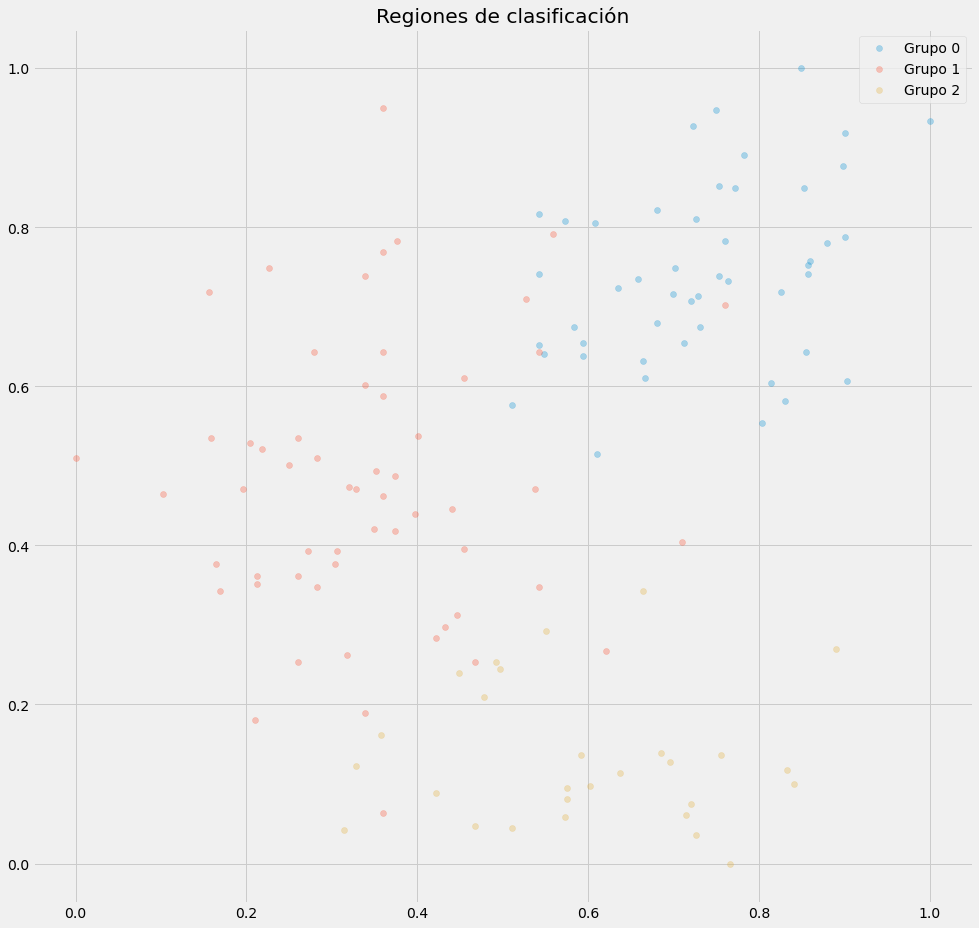

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

for i in np.unique(predicciones-1):
    ax.scatter(
        x = X_grid[predicciones-1 == i, 0],
        y = X_grid[predicciones-1 == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        #marker = 'o',
        alpha = 0.3,
        label= f"Grupo {i}"
    )
    


ax.set_title('Regiones de clasificación')
ax.legend();

In [40]:
np.unique(predicciones-1)


array([0, 1, 2], dtype=int64)